In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data = pd.read_csv('clinicaltrial_data.csv')
Drug_data = pd.read_csv('mouse_drug_data.csv')

# Combine the data into a single dataset

combined_table = pd.merge(mouse_data, Drug_data,
                                 how='left', on='Mouse ID')


# Display the data table for preview

combined_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Find drug names

Drug_names = combined_table['Drug'].unique()

Drug_names

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

Drug_group = combined_table.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame

# Preview DataFrame


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame


Tumor_volume_mean = Drug_group['Tumor Volume (mm3)'].mean()

Tumor_volume_mean

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
                          ...    
Zoniferol  25           55.432935
           30           57.713531
           35           60.089372
           40           62.916692
           45           65.960888
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [7]:
tumor_df = pd.DataFrame(Tumor_volume_mean).reset_index()
tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

SE_tumorVol = Drug_group['Tumor Volume (mm3)'].sem()


SE_tumorVol_df = pd.DataFrame(SE_tumorVol).reset_index()

SE_tumorVol_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [9]:
SE_tumorVol_df =  SE_tumorVol_df.reset_index()

mungleSE = SE_tumorVol_df.pivot(index = 'Timepoint' , columns = 'Drug')['Tumor Volume (mm3)']

mungleSE


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Pivots

mungled_Data = tumor_df.pivot(index = 'Timepoint' , columns = 'Drug')['Tumor Volume (mm3)']

mungled_Data

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


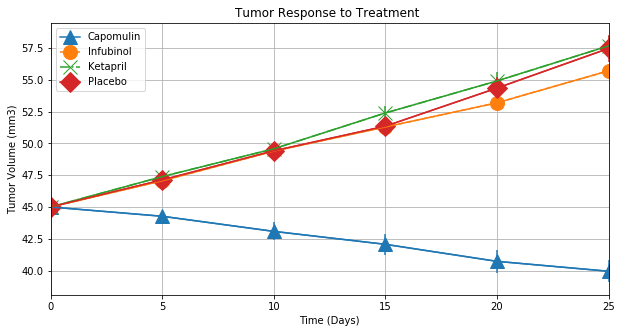

In [35]:
df = pd.DataFrame({ 'Time': [0, 5, 10, 15, 20, 25],
                   'Capomulin': [45.0, 44.27, 43.08, 42.06, 40.72, 39.94],
                   'Infubinol': [45.0, 47.06, 49.40, 51.30, 53.20, 55.72],
                   'Ketapril': [45.0, 47.39, 49.58, 52.40, 54.92, 57.68],
                   'Placebo': [45.0, 47.13, 49.42, 51.36, 54.36, 57.48]})

df.set_index('Time', inplace=True)

errors = pd.DataFrame({ 'Time': [0, 5, 10, 15, 20, 25],
                       'Capomulin': [0.0, 0.45, 0.70, 0.84, 0.91, 0.88],
                       'Infubinol': [0.0, 0.24, 0.28, 0.36, 0.48, 0.55],
                       'Ketapril': [0.0, 0.26, 0.36, 0.58, 0.73, 0.76],
                       'Placebo': [0.0, 0.22, 0.40, 0.61, 0.84, 1.03]})
errors.set_index('Time', inplace=True)

ax = df.plot(figsize=(10,5), yerr = errors, legend = False)

ax.set_prop_cycle(None)

df.plot(figsize=(10,5), style=['^-', 'o--', 'x-.', 'D-'], markersize=14, ax = ax)

plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig(os.path.join('figures','visual0.png'))


plt.show()

## Metastatic Response to Treatment

In [12]:
combined_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint

Drug_group = combined_table.groupby(['Drug', 'Timepoint'])

Metastat_mean = Drug_group['Metastatic Sites'].mean()

Metastat_mean


# Convert to DataFrame

Metastat_mean_df = pd.DataFrame(Metastat_mean).reset_index()

# Preview DataFrame
Metastat_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [14]:
# Mungle

Metastat_mean_df = Metastat_mean_df.reset_index()

mungle_MS_mean = Metastat_mean_df.pivot(index = 'Timepoint' , columns = 'Drug')['Metastatic Sites']

mungle_MS_mean


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

Metastat_SE = Drug_group['Metastatic Sites'].sem()

# Convert to DataFrame

Metastat_SE_df = pd.DataFrame(Metastat_SE).reset_index()

# Preview DataFrame

Metastat_SE_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [16]:
# Minor Data Munging 

Metastat_SE_df = Metastat_SE_df.reset_index()

mungle_MS_sterror = Metastat_SE_df.pivot(index = 'Timepoint' , columns = 'Drug') ["Metastatic Sites"]

mungle_MS_sterror


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


No handles with labels found to put in legend.


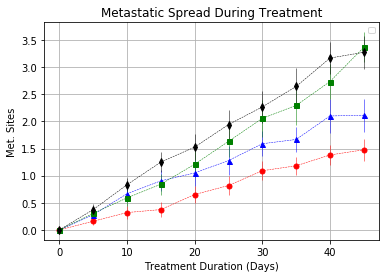

In [34]:
# Generate the Plot (with Error Bars)

plt.errorbar(mungle_MS_mean.index, mungle_MS_mean["Capomulin"], yerr=mungle_MS_sterror["Capomulin"], color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mungle_MS_mean.index, mungle_MS_mean["Infubinol"], yerr=mungle_MS_sterror["Infubinol"], color="blue", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mungle_MS_mean.index, mungle_MS_mean["Ketapril"], yerr=mungle_MS_sterror["Ketapril"], color="green", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mungle_MS_mean.index, mungle_MS_mean["Placebo"], yerr=mungle_MS_sterror["Placebo"], color="black", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig(os.path.join('figures','visual1.png'))

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count = combined_table.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

mouse_count = pd.DataFrame({"Mouse Count": mouse_count})
                               
mouse_count.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [19]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = mouse_count.reset_index()
mouse_count_pivot = mouse_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
mouse_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


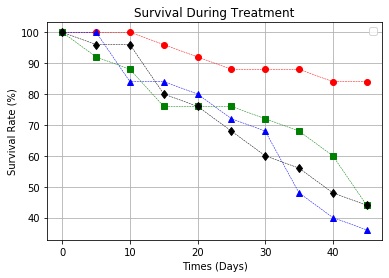

In [33]:
#Solution 1:

drug_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]

for drug, marker, color in drug_list:
    mouse_count = mouse_count_pivot[drug][0]
    survival_rate = (mouse_count_pivot[drug] / mouse_count)*100
    survival_rate_plt = plt.plot(mouse_count_pivot.index,survival_rate, marker=marker,ls='--',color=color,linewidth=0.5)
    
# Show the Figure
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig(os.path.join('figures','visual2.png'))

No handles with labels found to put in legend.


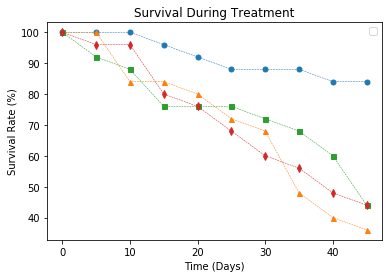

In [27]:
#Solution 2:

plt.plot(100 * mouse_count_pivot["Capomulin"] / 25, "o", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_count_pivot["Infubinol"] / 25, "^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_count_pivot["Ketapril"] / 25, "s", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_count_pivot["Placebo"] / 25 , "d", linestyle="dashed", markersize=5, linewidth=0.50)

plt.legend()

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")

# Setting the grid
ax.grid(linestyle='dotted')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [21]:
mungled_Data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [22]:
mungleSE

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [23]:
# Calculate the percent changes for each drug

pct_change =  100 * (mungled_Data.iloc[9] - mungled_Data.iloc[0]) / mungled_Data.iloc[0]
pct_change_SE =  100 * (mungleSE.iloc[9] - mungleSE.iloc[0]) / mungleSE.iloc[0]


# Display the data to confirm
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

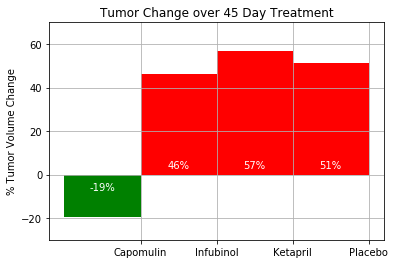

In [32]:
# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
passornot = pct_change < 0
change_list = [(pct_change[drug])for drug in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passornot.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(i):
    for i in i:
        height = i.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(i.get_x() + i.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig(os.path.join('figures','visual3.png'))

![Metastatic Spread During Treatment](../Images/change.png)